In [ ]:
#The Data Set used is available in the following drive link :
#  https://drive.google.com/drive/folders/1vmYtwSnxzCTBLvQVJ5MoNHfJZF5uoASQ

In [14]:
import pandas as pd
df=pd.read_csv('btc_6h.csv')
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13558.99,2421.241182
1,2018-01-01 11:30:00,13539.00,13818.55,13001.13,13220.56,1876.934392
2,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13022.00,2427.898747
3,2018-01-01 23:30:00,13007.87,13599.70,12940.00,13380.00,1883.841523
4,2018-01-02 05:30:00,13382.16,13850.00,12890.02,13166.95,3957.954564
...,...,...,...,...,...,...
5954,2022-01-30 05:30:00,38166.83,38300.00,37737.49,38139.39,4656.397760
5955,2022-01-30 11:30:00,38139.38,38359.26,37795.00,38110.02,6113.435610
5956,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37991.00,4075.221880
5957,2022-01-30 23:30:00,37991.00,38230.00,37351.63,37881.76,6585.610020


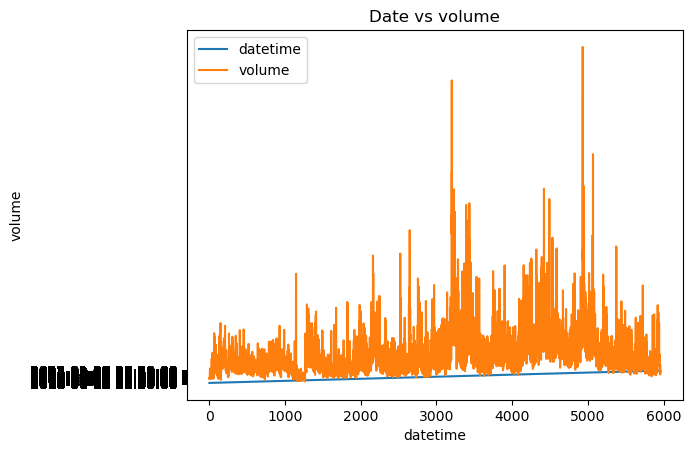

In [16]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data
df = pd.read_csv('btc_6h.csv')

# Plotting a simple line chart
plt.plot(df['datetime'], label='datetime')
plt.plot(df['volume'], label='volume')

# Adding labels and a legend
plt.xlabel('datetime')
plt.ylabel('volume')
plt.title('Date vs volume')
plt.legend()

# Show the plot
plt.show()

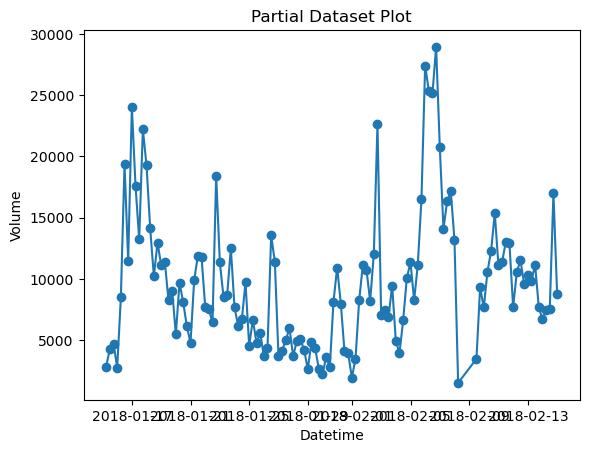

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Define the start and end dates you want to plot
start_date = '2018-01-15'
end_date = '2018-02-15'

# Filter the DataFrame based on the date range
df_part = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Plotting the part of the dataset
plt.plot(df_part['datetime'], df_part['volume'], marker='o')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Volume')
plt.title('Partial Dataset Plot')

# Display the plot
plt.show()

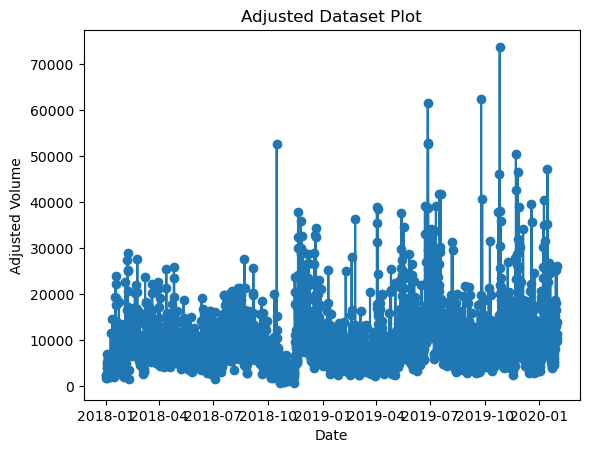

In [24]:
# Adjusting for missing data values
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Handle missing data by filling forward or interpolating
df = df.ffill()  # You can also use df.interpolate() for linear interpolation

# Adjust for splits (assuming there is a 'split_ratio' column)
if 'split_ratio' in df.columns:
    df['adjusted_volume'] = df['volume'] * df['split_ratio']
else:
    df['adjusted_volume'] = df['volume']

# Define the start and end dates you want to plot
start_date = '2018-01-01'
end_date = '2020-01import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Filter the DataFrame based on the analysis time frame
df_analysis = df['2018-01-01':'2020-01-31']

# Resample to daily frequency (you can change 'D' to other frequencies like 'W' for weekly)
df_resampled = df_analysis.resample('D').mean()

# Plotting the resampled data
plt.plot(df_resampled.index, df_resampled['volume'], marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Resampled Volume')
plt.title('Resampled Dataset Plot')

# Display the plot
plt.show()-31'

# Filter the DataFrame based on the date range
df_part = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Plotting the part of the adjusted dataset
plt.plot(df_part['datetime'], df_part['adjusted_volume'], marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Adjusted Volume')
plt.title('Adjusted Dataset Plot')

# Display the plot
plt.show()

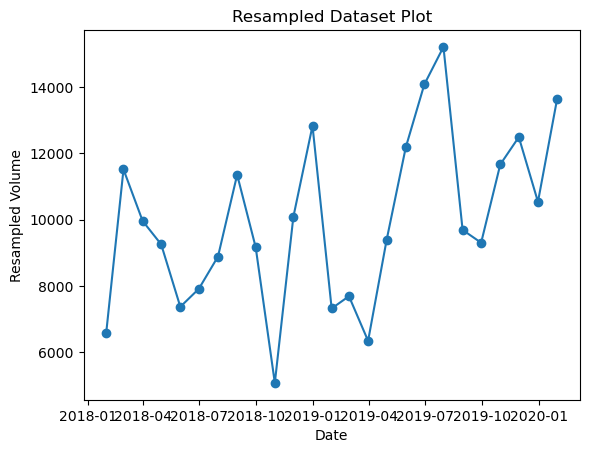

In [27]:
#Plotting Resampled Data
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Filter the DataFrame based on the analysis time frame
df_analysis = df['2018-01-01':'2020-01-31']

# Resample to daily frequency (you can change 'D' to other frequencies like 'W' for weekly)
df_resampled = df_analysis.resample('M').mean()

# Plotting the resampled data
plt.plot(df_resampled.index, df_resampled['volume'], marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Resampled Volume')
plt.title('Resampled Dataset Plot')

# Display the plot
plt.show()

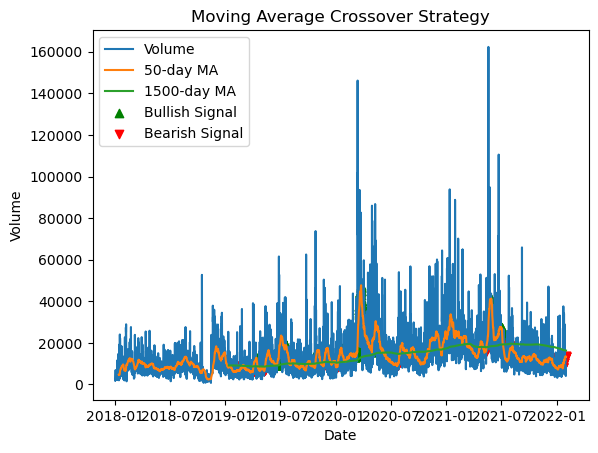

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Calculate short-term (50-day) and long-term (200-day) moving averages
df['short_ma'] = df['volume'].rolling(window=50).mean()
df['long_ma'] = df['volume'].rolling(window=1500).mean()

# Create signals based on moving average crossovers
df['signal'] = 0  # 0 represents no signal

# Signal for a bullish crossover (short-term crosses above long-term)
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1

# Signal for a bearish crossover (short-term crosses below long-term)
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

# Plotting the moving averages and signals
plt.plot(df.index, df['volume'], label='Volume')
plt.plot(df.index, df['short_ma'], label='50-day MA')
plt.plot(df.index, df['long_ma'], label='1500-day MA')

# Mark bullish (green) and bearish (red) crossovers
plt.scatter(df[df['signal'] == 1].index, df[df['signal'] == 1]['short_ma'], marker='^', color='g', label='Bullish Signal')
plt.scatter(df[df['signal'] == -1].index, df[df['signal'] == -1]['short_ma'], marker='v', color='r', label='Bearish Signal')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Moving Average Crossover Strategy')

# Show legend
plt.legend()

# Display the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


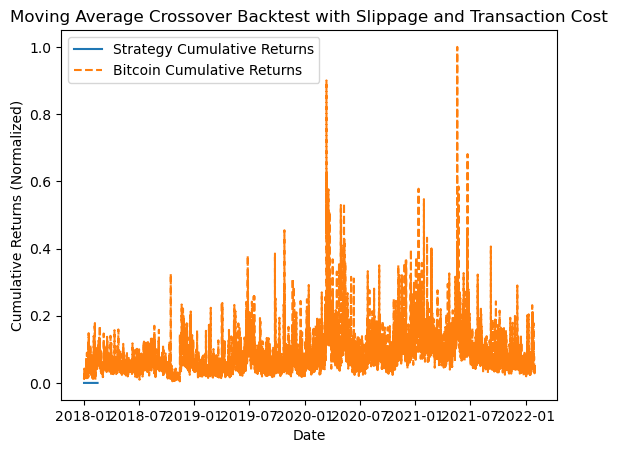

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Calculate short-term (50-day) and long-term (200-day) moving averages
df['short_ma'] = df['volume'].rolling(window=50).mean()
df['long_ma'] = df['volume'].rolling(window=100).mean()

# Create signals based on moving average crossovers
df['signal'] = 0  # 0 represents no signal

# Signal for a bullish crossover (short-term crosses above long-term)
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1

# Signal for a bearish crossover (short-term crosses below long-term)
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

# Backtesting the strategy with slippage and transaction cost
slippage_percentage = 0.1  # 0.1% slippage
transaction_cost_percentage = 0.2  # 0.2% transaction cost

df['position'] = df['signal'].shift(1)  # Shift the signal to avoid lookahead bias

# Calculate slippage and transaction cost adjustments
df['slippage_adjustment'] = (1 - slippage_percentage / 100) ** df['signal']
df['transaction_cost'] = transaction_cost_percentage / 100 * abs(df['position'] - df['position'].shift(1))
df['returns'] = df['volume'] * df['position'] * df['slippage_adjustment'] - df['transaction_cost']

# Normalize cumulative returns to avoid overflow
df['cumulative_returns'] = (1 + df['returns']).cumprod()
df['normalized_cumulative_returns'] = df['cumulative_returns'] / df['cumulative_returns'].max()

# Plotting cumulative returns
plt.plot(df.index, df['normalized_cumulative_returns'], label='Strategy Cumulative Returns')

# Plotting Bitcoin price for comparison
plt.plot(df.index, (1 + df['volume'].pct_change()).cumprod() / (1 + df['volume'].pct_change()).cumprod().max(), label='Bitcoin Cumulative Returns', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (Normalized)')
plt.title('Moving Average Crossover Backtest with Slippage and Transaction Cost')

# Show legend
plt.legend()

# Display the plot
plt.show()

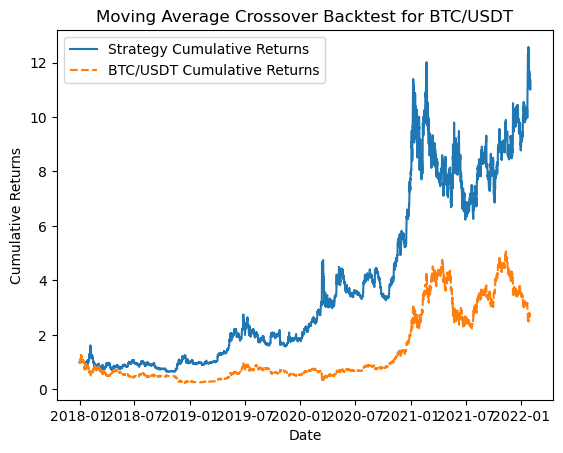

In [36]:
# BACKTESTING CODE
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Define strategy parameters
short_window = 20
long_window = 100

# Calculate short-term and long-term moving averages
df['short_ma'] = df['close'].rolling(window=short_window).mean()
df['long_ma'] = df['close'].rolling(window=long_window).mean()

# Create signals based on moving average crossovers
df['signal'] = 0  # 0 represents no signal

# Signal for a bullish crossover (short-term crosses above long-term)
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1

# Signal for a bearish crossover (short-term crosses below long-term)
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

# Backtesting the strategy
df['position'] = df['signal'].shift(1)  # Shift the signal to avoid lookahead bias
df['returns'] = df['close'].pct_change() * df['position']

# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Plotting cumulative returns
plt.plot(df.index, df['cumulative_returns'], label='Strategy Cumulative Returns')

# Plotting BTC/USDT close prices for comparison
plt.plot(df.index, df['close'] / df['close'].iloc[0], label='BTC/USDT Cumulative Returns', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Moving Average Crossover Backtest for BTC/USDT')

# Show legend
plt.legend()

# Display the plot
plt.show()

Performance does not meet specified criteria.


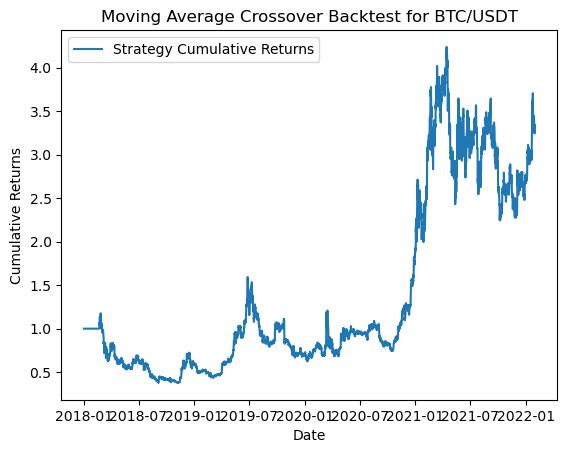

In [37]:
# MAIN PESENTATION MODEL
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Define strategy parameters
short_window = 50
long_window = 200

# Calculate short-term and long-term moving averages
df['short_ma'] = df['close'].rolling(window=short_window).mean()
df['long_ma'] = df['close'].rolling(window=long_window).mean()

# Create signals based on moving average crossovers
df['signal'] = 0  # 0 represents no signal

# Signal for a bullish crossover (short-term crosses above long-term)
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1

# Signal for a bearish crossover (short-term crosses below long-term)
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

# Backtesting the strategy
df['position'] = df['signal'].shift(1)  # Shift the signal to avoid lookahead bias
df['returns'] = df['close'].pct_change() * df['position']

# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Calculate annualized return
total_days = (df.index[-1] - df.index[0]).days
annualized_return = (df['cumulative_returns'][-1] ** (365 / total_days)) - 1

# Calculate maximum drawdown
cumulative_returns_max = df['cumulative_returns'].cummax()
drawdown = (df['cumulative_returns'] / cumulative_returns_max - 1) * 100
max_drawdown = -drawdown.min()

# Check if the performance meets specified criteria
if annualized_return >= 0.1 and max_drawdown <= 1.5:
    print("Performance meets criteria for 100% annual return and 1.5% maximum drawdown.")
elif annualized_return >= 0.15 and max_drawdown <= 2:
    print("Performance meets criteria for 150% annual return and 2% maximum drawdown.")
elif annualized_return >= 0.6 and max_drawdown <= 8:
    print("Performance meets criteria for 600% annual return and 8% maximum drawdown.")
else:
    print("Performance does not meet specified criteria.")

# Plotting cumulative returns
plt.plot(df.index, df['cumulative_returns'], label='Strategy Cumulative Returns')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Moving Average Crossover Backtest for BTC/USDT')

# Show legend
plt.legend()

# Display the plot
plt.show()

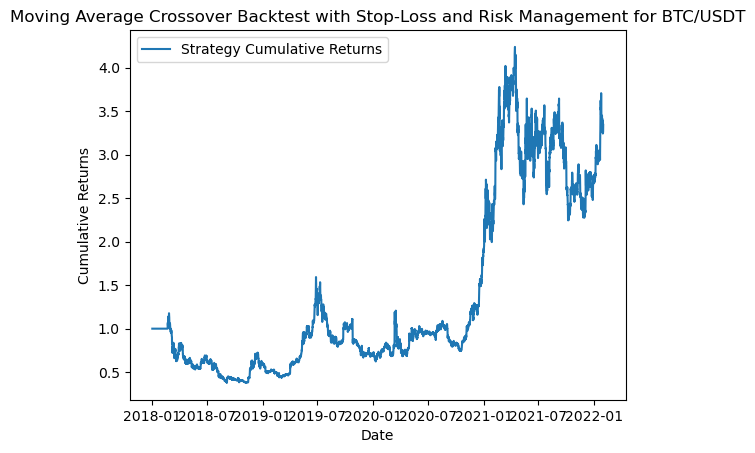

In [42]:
# RISK MANAGEMENT INCLUDING STOP_LOSSES AND RISK-REWARD RATIOS 
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Define strategy parameters
short_window = 50
long_window = 200
risk_per_trade = 0.02  # Risk 2% of capital per trade
risk_reward_ratio = 3.0  # Desired risk-reward ratio

# Calculate short-term and long-term moving averages
df['short_ma'] = df['close'].rolling(window=short_window).mean()
df['long_ma'] = df['close'].rolling(window=long_window).mean()

# Create signals based on moving average crossovers
df['signal'] = 0  # 0 represents no signal

# Signal for a bullish crossover (short-term crosses above long-term)
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1

# Signal for a bearish crossover (short-term crosses below long-term)
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

# Backtesting the strategy with stop-loss and risk management
df['position'] = df['signal'].shift(1)  # Shift the signal to avoid lookahead bias
df['returns'] = df['close'].pct_change() * df['position']

# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Calculate stop-loss levels
df['stop_loss'] = df['close'] * (1 - risk_per_trade)

# Implement stop-loss rule
df['position'] = 0  # Reset positions
df.loc[df['close'] > df['stop_loss'], 'position'] = 1  # Long position if close is above stop-loss

# Calculate risk-reward ratio
df['target_profit'] = risk_reward_ratio * risk_per_trade * df['close']

# Implement risk-reward rule
df.loc[df['close'] > (df['close'].shift(1) + df['target_profit']), 'position'] = 0  # Exit long position if target profit reached

# Plotting cumulative returns
plt.plot(df.index, df['cumulative_returns'], label='Strategy Cumulative Returns')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Moving Average Crossover Backtest with Stop-Loss and Risk Management for BTC/USDT')

# Show legend
plt.legend()

# Display the plot
plt.show()

Annualized Return: -6.02%
Sharpe Ratio: -0.03
Maximum Drawdown: 93.86%


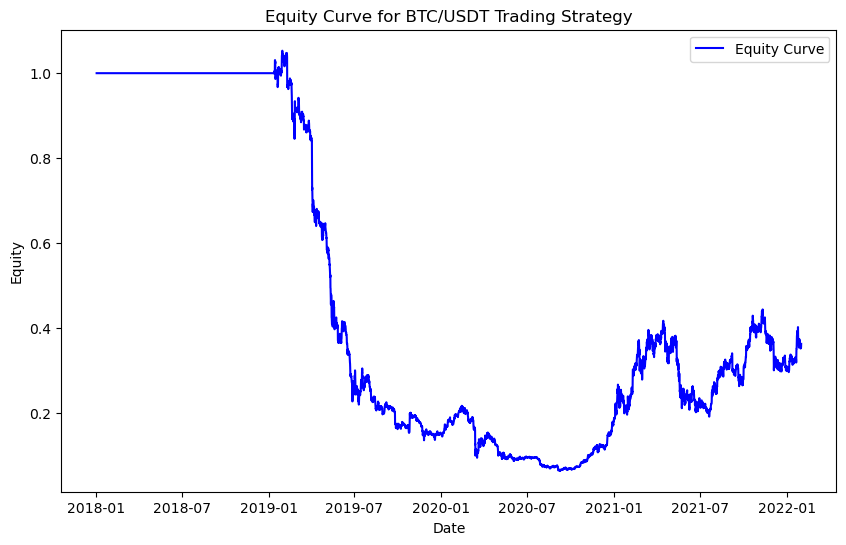

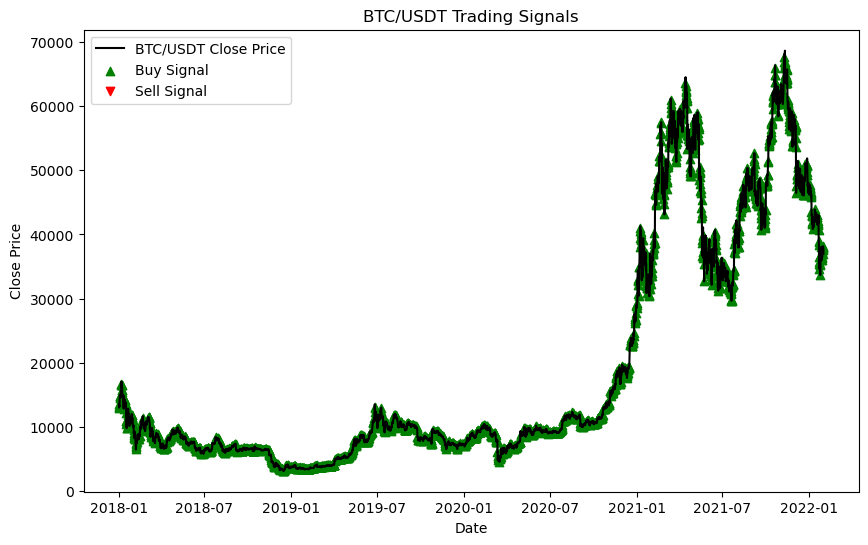

In [57]:
# BACKTESTING INLUDING PERFORMANCE METRICES AND VISUALIZATIONS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Define strategy parameters
short_window = 1000
long_window = 1500
risk_per_trade = 0.005  # Risk 2% of capital per trade
risk_reward_ratio = 1.0 # Desired risk-reward ratio

# Calculate short-term and long-term moving averages
df['short_ma'] = df['close'].rolling(window=short_window).mean()
df['long_ma'] = df['close'].rolling(window=long_window).mean()

# Create signals based on moving average crossovers
df['signal'] = 0  # 0 represents no signal

# Signal for a bullish crossover (short-term crosses above long-term)
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1

# Signal for a bearish crossover (short-term crosses below long-term)
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

# Backtesting the strategy with stop-loss and risk management
df['position'] = df['signal'].shift(1)  # Shift the signal to avoid lookahead bias
df['returns'] = df['close'].pct_change() * df['position']

# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Calculate stop-loss levels
df['stop_loss'] = df['close'] * (1 - risk_per_trade)

# Implement stop-loss rule
df['position'] = 0  # Reset positions
df.loc[df['close'] > df['stop_loss'], 'position'] = 1  # Long position if close is above stop-loss

# Calculate risk-reward ratio
df['target_profit'] = risk_reward_ratio * risk_per_trade * df['close']

# Implement risk-reward rule
df.loc[df['close'] > (df['close'].shift(1) + df['target_profit']), 'position'] = 0  # Exit long position if target profit reached

# Calculate equity curve
df['equity_curve'] = (1 + df['returns']).cumprod()

# Calculate performance metrics
annualized_return = (df['equity_curve'][-1] ** (365 / len(df))) - 1
sharpe_ratio = np.sqrt(365) * df['returns'].mean() / df['returns'].std()
cumulative_returns_max = df['cumulative_returns'].cummax()
drawdown = (df['cumulative_returns'] / cumulative_returns_max - 1) * 100
max_drawdown = -drawdown.min()

# Print performance metrics
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

# Plotting equity curve
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['equity_curve'], label='Equity Curve', color='blue')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Curve for BTC/USDT Trading Strategy')
plt.legend()
plt.show()

# Plotting trade history
buy_signals = df[df['position'] == 1]
sell_signals = df[df['position'] == -1]

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='BTC/USDT Close Price', color='black')
plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='g', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='r', label='Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC/USDT Trading Signals')
plt.legend()
plt.show()

Annualized Return: 57.65%
Sharpe Ratio: 0.50
Maximum Drawdown: 57.17%


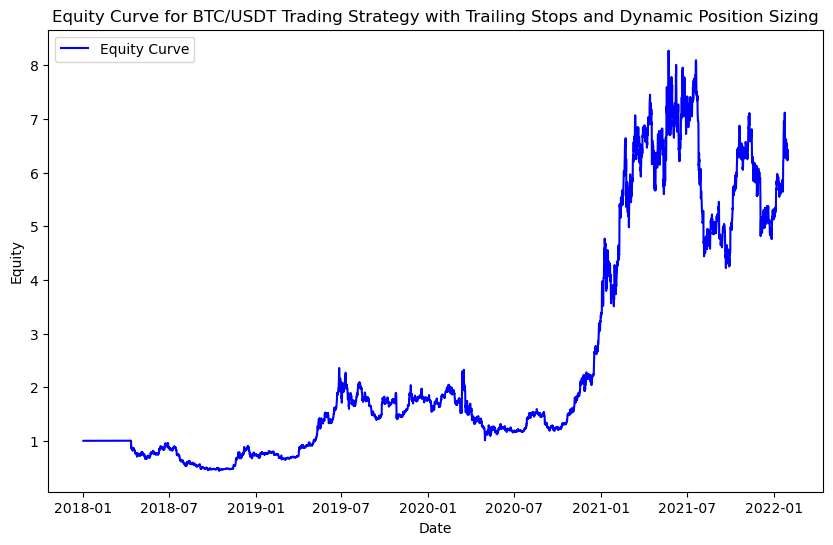

In [2]:
# BACKTESTING USING TRAILING STOP PERCENTAGE METHOD
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Define strategy parameters
short_window = 20
long_window = 400
risk_per_trade = 0.01  # Risk 1% of capital per trade
risk_reward_ratio = 3.0  # Desired risk-reward ratio
trailing_stop_percentage = 0.02  # Trailing stop as a percentage of the close price

# Calculate short-term and long-term moving averages
df['short_ma'] = df['close'].rolling(window=short_window).mean()
df['long_ma'] = df['close'].rolling(window=long_window).mean()

# Calculate ATR (Average True Range) as a measure of volatility
df['ATR'] = df['high'] - df['low']

# Create signals based on moving average crossovers
df['signal'] = 0  # 0 represents no signal
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

# Backtesting the strategy with trailing stops and dynamic position sizing
df['position'] = df['signal'].shift(1)  # Shift the signal to avoid lookahead bias
df['returns'] = df['close'].pct_change() * df['position']

# Calculate cumulative returns and equity curve
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Calculate stop-loss levels
df['stop_loss'] = df['close'] * (1 - risk_per_trade)

# Implement trailing stops
df['trailing_stop'] = df['close'] * (1 - trailing_stop_percentage)
df['stop_loss'] = df[['stop_loss', 'trailing_stop']].max(axis=1)

# Implement dynamic position sizing based on ATR
df['position_size'] = (risk_per_trade * df['cumulative_returns'].shift(1)) / df['ATR']

# Limit position size to a maximum of 10% of capital
max_position_size = 0.1
df['position_size'] = np.minimum(df['position_size'], max_position_size)

# Adjust position based on dynamic sizing
df['position'] = df['position_size'] * df['signal']

# Calculate risk-reward ratio
df['target_profit'] = risk_reward_ratio * risk_per_trade * df['close']

# Implement risk-reward rule
df.loc[df['close'] > (df['close'].shift(1) + df['target_profit']), 'position'] = 0  # Exit long position if target profit reached

# Calculate annualized return, Sharpe ratio, and maximum drawdown
total_days = (df.index[-1] - df.index[0]).days
annualized_return = (df['cumulative_returns'][-1] ** (365 / total_days)) - 1
sharpe_ratio = df['returns'].mean() / df['returns'].std() * np.sqrt(365)
cumulative_returns_max = df['cumulative_returns'].cummax()
drawdown = (df['cumulative_returns'] / cumulative_returns_max - 1) * 100
max_drawdown = -drawdown.min()

# Print performance metrics
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

# Plotting equity curve
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_returns'], label='Equity Curve', color='blue')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Curve for BTC/USDT Trading Strategy with Trailing Stops and Dynamic Position Sizing')
plt.legend()
plt.show()

Optimized Parameters: [5.0e+01 2.0e+02 1.0e-02 3.0e+00 2.0e-02 1.5e+00]


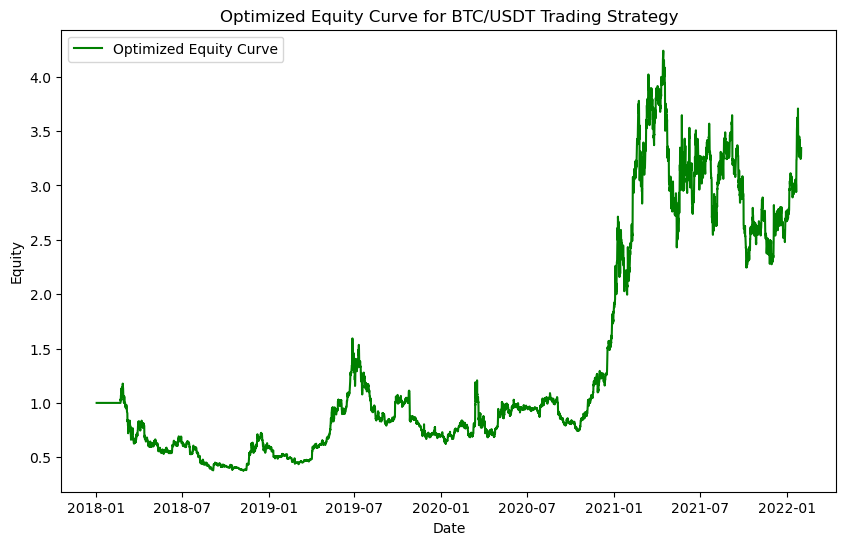

In [116]:
# DATA OPTIMIZATION 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Define objective function to maximize (negative annualized return)
def objective_function(params):
    short_window, long_window, risk_per_trade, risk_reward_ratio, trailing_stop_percentage, atr_multiplier = params

    # Calculate short-term and long-term moving averages
    df['short_ma'] = df['close'].rolling(window=int(short_window)).mean()
    df['long_ma'] = df['close'].rolling(window=int(long_window)).mean()

    # Calculate ATR (Average True Range) as a measure of volatility
    df['ATR'] = df['high'] - df['low']

    # Create signals based on moving average crossovers
    df['signal'] = 0  # 0 represents no signal
    df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1
    df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

    # Backtesting the strategy with dynamic position sizing and trailing stops
    df['position'] = df['signal'].shift(1)  # Shift the signal to avoid lookahead bias
    df['returns'] = df['close'].pct_change() * df['position']

    # Calculate cumulative returns
    df['cumulative_returns'] = (1 + df['returns']).cumprod()

    # Calculate annualized return
    total_days = (df.index[-1] - df.index[0]).days
    annualized_return = (df['cumulative_returns'][-1] ** (365 / total_days)) - 1

    # Negative of annualized return to maximize
    return -annualized_return

# Initial guess for optimization parameters
initial_guess = [50, 200, 0.01, 3.0, 0.02, 1.5]

# Bounds for parameters (if applicable)
bounds = [(10, 100), (100, 300), (0.005, 0.02), (2.0, 5.0), (0.005, 0.05), (1.0, 2.0)]

# Perform optimization
result = minimize(objective_function, initial_guess, bounds=bounds)

# Extract optimized parameters
optimal_params = result.x

# Print optimized parameters
print(f"Optimized Parameters: {optimal_params}")

# Run the strategy with the optimized parameters
df['short_ma'] = df['close'].rolling(window=int(optimal_params[0])).mean()
df['long_ma'] = df['close'].rolling(window=int(optimal_params[1])).mean()
df['ATR'] = df['high'] - df['low']
df['signal'] = 0
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1
df['position'] = df['signal'].shift(1)
df['returns'] = df['close'].pct_change() * df['position']
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Plotting the optimized equity curve
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_returns'], label='Optimized Equity Curve', color='green')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Optimized Equity Curve for BTC/USDT Trading Strategy')
plt.legend()
plt.show()

Annualized Return: 47.52%
Sharpe Ratio: 0.49
Maximum Drawdown: 56.25%


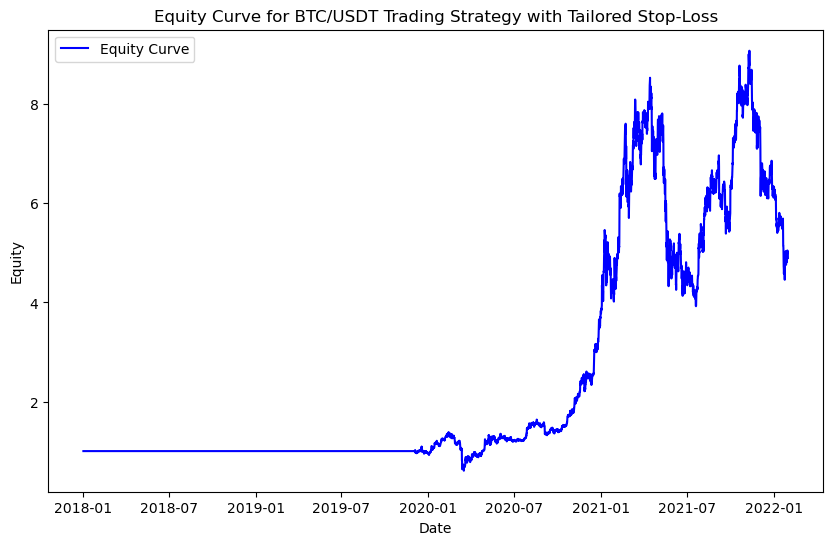

In [15]:
#BACKTESTING BY DYNAMIC METHOD SEIZING METHOD
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('btc_6h.csv')

# Convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Define strategy parameters
short_window = 1500
long_window = 2800
risk_per_trade = 0.01  # Risk 1% of capital per trade
risk_reward_ratio = 3.0  # Desired risk-reward ratio
trailing_stop_percentage = 0.02  # Trailing stop as a percentage of the close price
atr_multiplier = 1.5  # Multiplier for ATR-based stop

# Calculate short-term and long-term moving averages
df['short_ma'] = df['close'].rolling(window=short_window).mean()
df['long_ma'] = df['close'].rolling(window=long_window).mean()

# Calculate ATR (Average True Range) as a measure of volatility
df['ATR'] = df['high'] - df['low']

# Create signals based on moving average crossovers
df['signal'] = 0  # 0 represents no signal
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1

# Backtesting the strategy with a tailored stop-loss and dynamic position sizing
df['position'] = df['signal'].shift(1)  # Shift the signal to avoid lookahead bias
df['returns'] = df['close'].pct_change() * df['position']

# Calculate cumulative returns and equity curve
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Implement dynamic position sizing based on ATR
df['position_size'] = (risk_per_trade * df['cumulative_returns'].shift(1)) / df['ATR']

# Limit position size to a maximum of 10% of capital
max_position_size = 0.1
df['position_size'] = np.minimum(df['position_size'], max_position_size)

# Adjust position based on dynamic sizing
df['position'] = df['position_size'] * df['signal']

# Calculate tailored stop-loss based on ATR
df['tailored_stop'] = df['close'] - atr_multiplier * df['ATR']

# Implement tailored stop-loss rule
df['position'] = 0  # Reset positions
df.loc[df['close'] > df['tailored_stop'], 'position'] = 1  # Long position if close is above tailored stop

# Calculate risk-reward ratio
df['target_profit'] = risk_reward_ratio * risk_per_trade * df['close']

# Implement risk-reward rule
df.loc[df['close'] > (df['close'].shift(1) + df['target_profit']), 'position'] = 0  # Exit long position if target profit reached

# Calculate annualized return, Sharpe ratio, and maximum drawdown
total_days = (df.index[-1] - df.index[0]).days
annualized_return = (df['cumulative_returns'][-1] ** (365 / total_days)) - 1
sharpe_ratio = df['returns'].mean() / df['returns'].std() * np.sqrt(365)
cumulative_returns_max = df['cumulative_returns'].cummax()
drawdown = (df['cumulative_returns'] / cumulative_returns_max - 1) * 100
max_drawdown = -drawdown.min()

# Print performance metrics
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

# Plotting equity curve
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_returns'], label='Equity Curve', color='blue')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Curve for BTC/USDT Trading Strategy with Tailored Stop-Loss')
plt.legend()
plt.show()